# Lab 2.6

Goals:
 
* Generate random data using numpy.
* Generate histograms using matplotlib.
* Determine how the average of a sample of a random variable behaves.


### Instructions
* With your group, work through each of the questions below.  Most questions include some discussion and some bullet-pointed instructions.  Make sure you carry out the bullet-pointed instructions, because that it what is graded.  
* You are expected to collaborate with your group.  You should arrive at the answers to these questions together.  However, your submitted answers should be expressed in your own words.
* If you need to pause, you can save and come back to your work later.  
* When you are done, select "download .ipynb" from the file menu.  Save the ipynb to your computer, then upload it to the Lab assignment in gradescope.


In this lab we're going to generate random data and display it.  First we'll need to import libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

First you'll need a random variable to study.  Run the code cell below to define some PDFs, then pick a different one than other members of your group.  Be sure to read the comments below your choice.

In [3]:
def pdf1(x):
  return np.where((x >= 0) & (x <= 1) , x*(1-x)**4*30,0)
# pdf1 is the pdf of the beta(2,5) random variable
# create a size n sample of beta (2,5) with
# np.random.beta(2,5,n)

def pdf2(x):
  return np.where((x >= 3) & (x <= 6) , (2*x-6)/9,0)
# pdf2 is the pdf of the triangular(3,6,6) random variable
# create a size n sample of triangular(3,6,6) with
# np.random.triangular(3, 6, 6, n)

def pdf3(x):
  return np.where((x >= 1) & (x <= 6) , 0.2,0)
# pdf3 is the pdf of the uniform random variable on [1,6]
# create a size n sample of this variable with
# np.random.uniform(1,6,n)

def pdf4(x):
  return np.where((x > 0) & (x < 1) , 1/x**0.5/(1-x)**(0.5)/3.1415926,0)
# pdf4 is the pdf of the beta(0.5,0.5) random variable
# create a size n sample of beta(0.5,0.5) with
# np.random.beta(0.5,0.5,n)

def pdf5(x):
  return np.where((x >= 2) & (x < 4) , (4-x)/2,0)
# pdf5 is the pdf of the triangular(2,2,4) random variable
# create a size n sample of triangular(2,2,4) with
# np.random.triangular(2,2,4,n)

def pdf6(x):
    return np.where((x >= 0) & (x < 1) , 70*x**3/(1-x)**(0.5)/64,0)
# pdf6 is the pdf of the beta(4,0.5) random variable
# create a size n sample of beta(4,0.5) with
# np.random.beta(4,0.5,n)

## Q1 

We saw in the pre-lab that a histogram of a sample from a normal random variable looks like the pdf of that variable.

* Make a nice graph that shows a properly sized and binned histogram of a sample from your random variable lines up with a plot of your PDF.  
 * You will need to pick your `x` values to line up with the outcomes of your random variable.
 * You will also have to resize (by multiplying) the PDF outputs to make your histogram and your plot the same height.
 * Make sure your graph has a title.

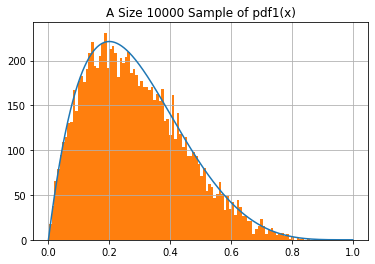

In [4]:
n=10000
sample=np.random.beta(2,5,n)
x=np.arange(0,1,0.001)
ax=plt.axes()
ax.grid()
ax.plot(x,pdf1(x)*90)
ax.hist(sample, bins=100)
ax.set_title('A Size 10000 Sample of pdf1(x)')
plt.show()

## Q2
Recall that averaging samples of a random variable produces a new random variable.  We will see how that works with your random variable.
* Rewrite the `sampleaverage()` function from the prelab to create averages of samples from your random variable instead of a normal random variable.
* Use your new `sampleaverage()` function to make an array of 10000 averages of samples of your random variable with sample size
 * 1
 * 10
 * 100
 * and 1000
* Make histograms of each of these samples.  Include useful titles!  
* Explain how the shape of the histograms appears to be changing as the sample size increases from 1 to 1000.

In [5]:
def sampleaverage(samples=1,averages=1):
  averagesarray=np.array([])
  for i in range(averages):
    sample=np.random.beta(2,5,size=samples)
    x=np.average(sample)
    averagesarray=np.append(averagesarray,x)
  return averagesarray

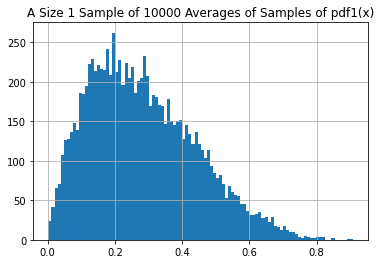

In [6]:
sample=sampleaverage(1,10000)
ax=plt.axes()
ax.grid()
ax.hist(sample, bins=100)
ax.set_title('A Size 1 Sample of 10000 Averages of Samples of pdf1(x)')
plt.show()

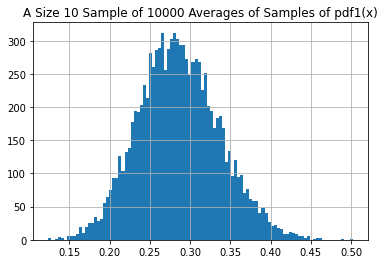

In [7]:
sample=sampleaverage(10,10000)
ax=plt.axes()
ax.grid()
ax.hist(sample, bins=100)
ax.set_title('A Size 10 Sample of 10000 Averages of Samples of pdf1(x)')
plt.show()

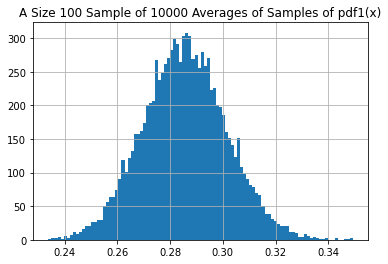

In [8]:
sample=sampleaverage(100,10000)
ax=plt.axes()
ax.grid()
ax.hist(sample, bins=100)
ax.set_title('A Size 100 Sample of 10000 Averages of Samples of pdf1(x)')
plt.show()

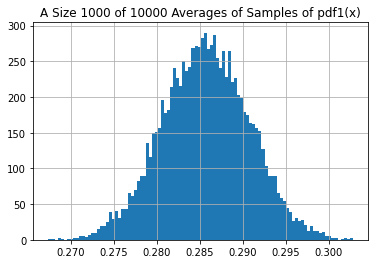

In [9]:
sample=sampleaverage(1000,10000)
ax=plt.axes()
ax.grid()
ax.hist(sample, bins=100)
ax.set_title('A Size 1000 of 10000 Averages of Samples of pdf1(x)')
plt.show()

As the sample size increases from 1 to 1000, the shape of the histograms appears to be more like a bell-shaped curve/normal distribution.

## Q3 

When the sample size is large, the average is approximately a normal random variable. That's why your graphs started looking like bell curves.  But what are the parameters ($\mu$, $\sigma$) of these normal random variables?
* Make a nice histogram showing how last random variable in Q2 (sample size 1000) matches up to a normal PDF using `norm.pdf()`.  Make sure your graph has a title.

You'll have to do some trial and error with your $\mu$, $\sigma$ and height multiplier to make this work.

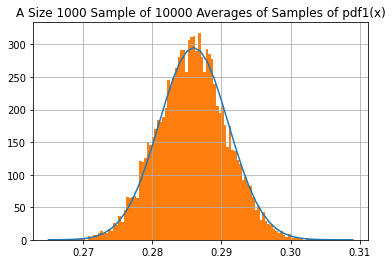

In [10]:
sample=sampleaverage(1000,10000)
x=np.arange(0.265,0.310,0.001)
mu=0.286
sigma=0.005
y=norm.pdf(x,mu,sigma)
ax=plt.axes()
ax.grid()
ax.plot(x,y*3.7)
ax.hist(sample, bins=100)
ax.set_title('A Size 1000 Sample of 10000 Averages of Samples of pdf1(x)')
plt.show()

## Q4

How does the number of samples in each average affect the parameters $\mu$ and $\sigma$?
* Increase the size of the samples you are averaging to 10000.  Make a nice histogram with a matching normal PDF and a title.
* In a text cell, explain how does the $\mu$ and $\sigma$ of this matching normal random variable compare to the $\mu$ and $\sigma$ from the sample size 1000 averages in Q3?



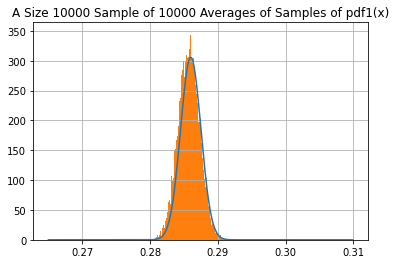

In [11]:
sample=sampleaverage(10000,10000)
x=np.arange(0.265,0.310,0.0001)
mu=0.286
sigma=0.0015
y=norm.pdf(x,mu,sigma)
ax=plt.axes()
ax.grid()
ax.plot(x,y*1.15)
ax.hist(sample, bins=100)
ax.set_title('A Size 10000 Sample of 10000 Averages of Samples of pdf1(x)')
plt.show()

Compared to the 𝜇 and 𝜎 from the sample size 1000 averages in Q3, the 𝜇 does not change, but the 𝜎 becomes smaller because the graph is narrower.

## Q5 

Other students in your group had different density functions than you.  They also obtained different values for $\mu$ and $\sigma$ in Q3.  Compare your data with theirs to answer the following questions in a text cell.
* What property of your density function appears to determine the value of $\mu$ in your distribution of averages? 
* How do the shapes of different density functions appear to affect the size of $\sigma$? Reference their shapes and $\sigma$s specifically in your answer.
* Why do the relationships you observed make sense?

Be sure you compare averages of the same sample sizes. If you and your groupmates are using different sized samples, you won't be able to tell whether the differences you observe come from differences in your random variables, or from differences in what averages you're collecting.  


1. The expected value of my density function appears to determine the value of μ in my distribution averages. The expected value of my function, pdf1(x), is 2/7, and the μ I got in Q3 is 0.286. The expected value of my partner's function, pdf3(x), is 3.5, and the μ she got in Q3 is 3.5. The expected value of my partner's function, pdf6(x), is 8/9, and the μ she got in Q3 is 0.889.
2. The density functions with a beta random variable (that is skewed) seem to have the smallest σ. The density functions with a triangular random variable seem to have the second smallest σ, and the density functions with a uniform random variable seem to have the largest σ. The standard deviations of pdf6(x) and pdf1(x), both with a beta random variable, my partner and I got are 0.004 and 0.005 respectively. The standard deviation of pdf2(x), with a triangular variable, is 0.02, and the standard deviation of pdf3(x), with a uniform variable, is 0.042.
3. The relationship makes sense because the expected value is the arithmetic mean of a large number of outcomes of a random variable. With symmetric density functions, it is the midpoint. For asymmetric density functions, it will be pulled toward regions of higher likelihood. So the 𝜇 will be around the expected values of the density functions. The standard deviation is a measure of the amount of variation or dispersion of a set of values. Since pdf1(x) and pdf6(x) are beta random variables, and one is skewed to the left and one to the right, there is a smaller probability of x being far from μ — most of x will be around μ. pdf2(x) is a triangular random variable, but since the slope of the density function is constant, the probability of x being around μ will be lower than the beta random variable. However, since pdf3(x) is a uniform random variable, x has an equal probability to be close or far from μ. Thus, compared to beta and triangular random variables, there is a larger probability of x being far from μ.

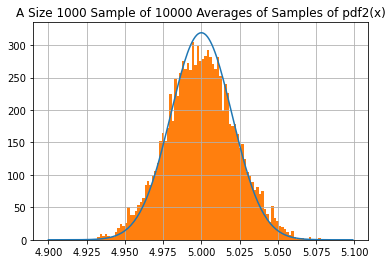

In [12]:
#2
def sampleaverage(samples=1,averages=1):
  averagesarray=np.array([])
  for i in range(averages):
    sample=np.random.triangular(3,6,6,size=samples)
    x=np.average(sample)
    averagesarray=np.append(averagesarray,x)
  return averagesarray

sample=sampleaverage(1000,10000)
x=np.arange(4.9,5.1,0.001)
mu=5
sigma=0.02
y=norm.pdf(x,mu,sigma)
ax=plt.axes()
ax.grid()
ax.plot(x,y*16)
ax.hist(sample, bins=100)
ax.set_title('A Size 1000 Sample of 10000 Averages of Samples of pdf2(x)')
plt.show()

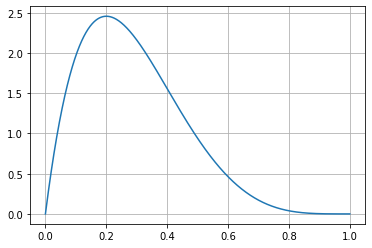

In [17]:
#3
x=np.arange(0,1,0.001)
ax=plt.axes()
ax.grid()
ax.plot(x,pdf1(x))
plt.show()

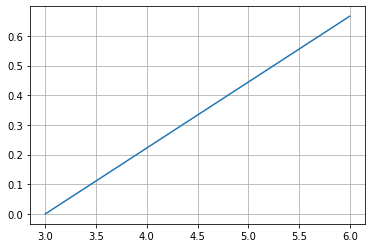

In [19]:
x=np.arange(3,6,0.001)
ax=plt.axes()
ax.grid()
ax.plot(x,pdf2(x))
plt.show()

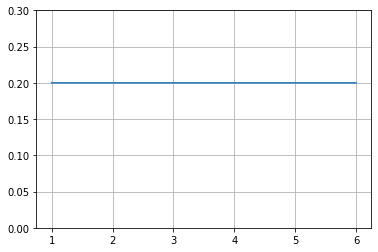

In [22]:
x=np.arange(1,6,0.001)
ax=plt.axes()
ax.grid()
ax.plot(x,pdf3(x))
plt.ylim((0,0.3))
plt.show()

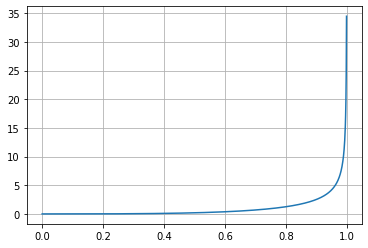

In [21]:
x=np.arange(0,1,0.001)
ax=plt.axes()
ax.grid()
ax.plot(x,pdf6(x))
plt.show()